Мышковец С.А., v.01 17.11.2022

Решение задачи: Проанализировать данные по выживаемости. Обучить модель предсказания выживет ли человек или нет.

Задачи:

- Проанализировать данные по выживаемости. 
- Обучить модель предсказания выживет ли человек или нет (ключевая переменная) (различные варианты визуализации можно посмотреть здесь https://www.kaggle.com/competitions/titanic/code?competitionId=3136&sortBy=scoreDescending&language=Python).
- Определить наиболее значимые переменные которые влияют на выживаемость. 
- Визуализировать дерево решений. 
- Написать вывод. Не копировать бездумно чужие работы. 

Вывод:
- Наличие семьи увеличивало шансы на выживание. Этот параметр имел наибольшее значение.
- После этого параметра следует наличие билета 1 класса и женский пол.
- Больше шансов выжить было у семей до 4-х человек.
- Возраст лишь 8 из 26 признаков, влияющих на выживаемость.
- На палубе С было самое большое кол-во выживших.

# 1. Осуществить корректную загрузку данных

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 50)
df = pd.read_csv("train.csv", sep= ',')

In [2]:
df1 = pd.read_csv("test.csv", sep= ',')

In [3]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Объединить train и test.

In [5]:
df = pd.concat([df, df1])

In [6]:
df.shape

(1309, 12)

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# 2. Удалить дубликаты

In [8]:
column_names = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [9]:
duplicates = df.duplicated(subset=column_names, keep=False)

In [10]:
df[duplicates].sort_values(by='PassengerId')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Дубликатов нет.

# 3. Осуществить разведывательный анализ данных:

## Проанализировать пропуски и решить, что с ними делать

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [13]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [14]:
df['Has family onboard'] = df['Ticket'].map(lambda a: 1 if df['Ticket'].value_counts()[a]>1 else 0)

In [15]:
df['Has family onboard'] = np.where((df['SibSp']>0), 1, df['Has family onboard'])

In [16]:
df['Has family onboard'] = np.where((df['SibSp']<1) & (df['Parch']<1), 0, df['Has family onboard'])

In [17]:
df['Ticket'].value_counts()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [18]:
df['Honorific'] = df['Name'].map(lambda a: (a.split(","))[1].split(' ')[1])

In [19]:
df['Last name'] = df['Name'].map(lambda a: (a.split(","))[0])

In [20]:
df["Honorific"] = df["Honorific"].replace('Mlle.', 'Ms.', regex=True)

In [21]:
df["Honorific"] = df["Honorific"].replace('Miss.', 'Ms.', regex=True)

In [22]:
df["Honorific"] = df["Honorific"].replace('Mme.', 'Mrs.', regex=True)

In [23]:
df["Honorific"] = df["Honorific"].replace('the', 'Countess', regex=True)

In [24]:
df['Honorific'].sort_values().unique()

array(['Capt.', 'Col.', 'Countess', 'Don.', 'Dona.', 'Dr.', 'Jonkheer.',
       'Lady.', 'Major.', 'Master.', 'Mr.', 'Mrs.', 'Ms.', 'Rev.', 'Sir.'],
      dtype=object)

In [25]:
df[df['Honorific']=='Master.']['Age'].mean()

5.482641509433963

In [26]:
df['Age'] = np.where((df['Age'].isnull()) & (df['Honorific'] == 'Master.'), df[df['Honorific']=='Master.']['Age'].mean(), df['Age'])

In [27]:
df[df['Honorific']=='Mrs.']['Age'].mean()

36.91812865497076

In [28]:
df['Age'] = np.where((df['Age'].isnull()) & (df['Honorific'] == 'Mrs.'), df[df['Honorific']=='Mrs.']['Age'].mean(), df['Age'])

In [29]:
df[df['Honorific']=='Mr.']['Age'].mean()

32.25215146299484

In [30]:
df['Age'] = np.where((df['Age'].isnull()) & (df['Honorific'] == 'Mr.'), df[df['Honorific']=='Mr.']['Age'].mean(), df['Age'])

In [31]:
df[df['Honorific']=='Ms.']['Age'].mean()

21.8243661971831

In [32]:
df['Age'] = np.where((df['Age'].isnull()) & (df['Honorific'] == 'Ms.'), df[df['Honorific']=='Ms.']['Age'].mean(), df['Age'])

In [33]:
df[df['Honorific']=='Dr.']['Age'].mean()

43.57142857142857

In [34]:
df['Age'] = np.where((df['Age'].isnull()) & (df['Honorific'] == 'Dr.'), df[df['Honorific']=='Dr.']['Age'].mean(), df['Age'])

In [35]:
df['Embarked'] = np.where(df['Embarked'].isnull(), 'S', df['Embarked'])

In [36]:
df['Fare'] = np.where(df['Fare'].isnull(), df[df['Pclass']==3]['Fare'].mean(), df['Fare'])

In [37]:
df.isna().sum()

PassengerId              0
Survived               418
Pclass                   0
Name                     0
Sex                      0
Age                      0
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Cabin                 1014
Embarked                 0
Has family onboard       0
Honorific                0
Last name                0
dtype: int64

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has family onboard,Honorific,Last name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr.,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs.,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Ms.,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs.,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr.,Allen


In [39]:
df[df['Last name']=='Rice']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has family onboard,Honorific,Last name
16,17,0.0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q,1,Master.,Rice
171,172,0.0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.125,NaN,Q,1,Master.,Rice
278,279,0.0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,NaN,Q,1,Master.,Rice
787,788,0.0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.125,NaN,Q,1,Master.,Rice
885,886,0.0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q,1,Mrs.,Rice
55,947,NaN,3,"Rice, Master. Albert",male,10.0,4,1,382652,29.125,NaN,Q,1,Master.,Rice


In [40]:
df['Family size'] = df['SibSp'] + df['Parch']

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         1309 non-null   int64  
 1   Survived            891 non-null    float64
 2   Pclass              1309 non-null   int64  
 3   Name                1309 non-null   object 
 4   Sex                 1309 non-null   object 
 5   Age                 1309 non-null   float64
 6   SibSp               1309 non-null   int64  
 7   Parch               1309 non-null   int64  
 8   Ticket              1309 non-null   object 
 9   Fare                1309 non-null   float64
 10  Cabin               295 non-null    object 
 11  Embarked            1309 non-null   object 
 12  Has family onboard  1309 non-null   int64  
 13  Honorific           1309 non-null   object 
 14  Last name           1309 non-null   object 
 15  Family size         1309 non-null   int64  
dtypes: floa

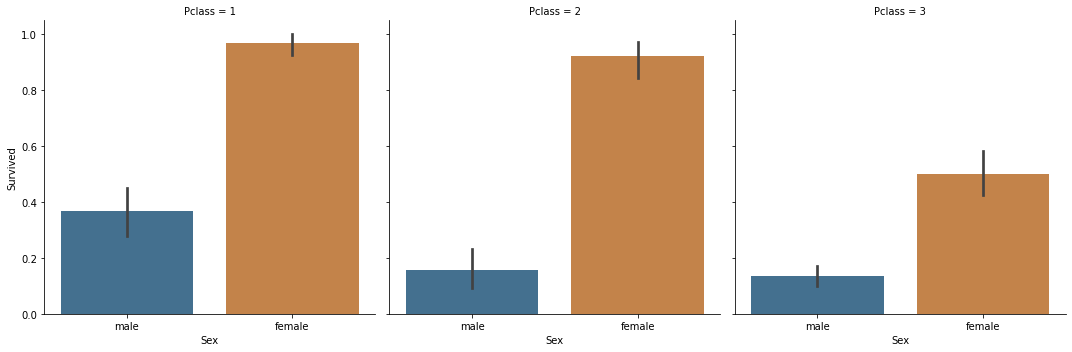

In [42]:
import seaborn as sns
sns.catplot(data = df,y='Survived',x='Sex',col='Pclass',
            kind='bar', saturation=0.5)

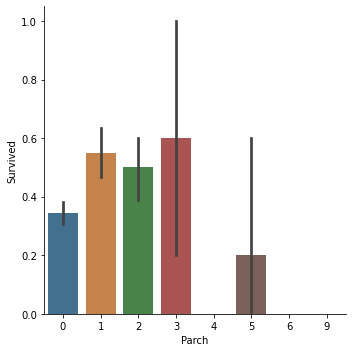

In [43]:
sns.catplot(data = df,y='Survived',x='Parch',
            kind='bar', saturation=0.5)

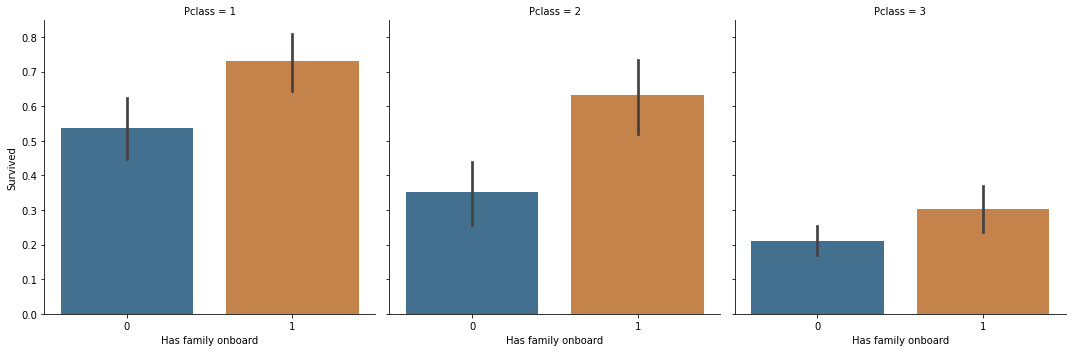

In [44]:
sns.catplot(data = df,y='Survived',x='Has family onboard',col='Pclass',
            kind='bar', saturation=0.5)

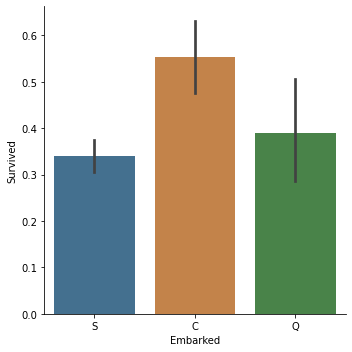

In [45]:
sns.catplot(data = df,y='Survived',x='Embarked',
            kind='bar', saturation=0.5)

In [46]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Last name'], axis=1)

In [47]:
df = pd.get_dummies(df
               ,columns = ['Sex']
               ,prefix = 'Sex'
               )

In [48]:
df = pd.get_dummies(df
               ,columns = ['Honorific']
               ,prefix = 'Honorific'
               )

In [49]:
df = pd.get_dummies(df
               ,columns = ['Embarked']
               ,prefix = 'Embarked'
               )

In [50]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Has family onboard,Family size,Sex_female,Sex_male,Honorific_Capt.,Honorific_Col.,Honorific_Countess,Honorific_Don.,Honorific_Dona.,Honorific_Dr.,Honorific_Jonkheer.,Honorific_Lady.,Honorific_Major.,Honorific_Master.,Honorific_Mr.,Honorific_Mrs.,Honorific_Ms.,Honorific_Rev.,Honorific_Sir.,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,22.000000,1,0,7.2500,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1.0,1,38.000000,1,0,71.2833,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1.0,3,26.000000,0,0,7.9250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1.0,1,35.000000,1,0,53.1000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0.0,3,35.000000,0,0,8.0500,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,32.252151,0,0,8.0500,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
414,NaN,1,39.000000,0,0,108.9000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
415,NaN,3,38.500000,0,0,7.2500,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
416,NaN,3,32.252151,0,0,8.0500,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Survived             891 non-null    float64
 1   Pclass               1309 non-null   int64  
 2   Age                  1309 non-null   float64
 3   SibSp                1309 non-null   int64  
 4   Parch                1309 non-null   int64  
 5   Fare                 1309 non-null   float64
 6   Has family onboard   1309 non-null   int64  
 7   Family size          1309 non-null   int64  
 8   Sex_female           1309 non-null   uint8  
 9   Sex_male             1309 non-null   uint8  
 10  Honorific_Capt.      1309 non-null   uint8  
 11  Honorific_Col.       1309 non-null   uint8  
 12  Honorific_Countess   1309 non-null   uint8  
 13  Honorific_Don.       1309 non-null   uint8  
 14  Honorific_Dona.      1309 non-null   uint8  
 15  Honorific_Dr.        1309 non-null   ui

In [52]:
df[df['Fare'].isnull()]

,Survived,Pclass,Age,SibSp,Parch,Fare,Has family onboard,Family size,Sex_female,Sex_male,Honorific_Capt.,Honorific_Col.,Honorific_Countess,Honorific_Don.,Honorific_Dona.,Honorific_Dr.,Honorific_Jonkheer.,Honorific_Lady.,Honorific_Major.,Honorific_Master.,Honorific_Mr.,Honorific_Mrs.,Honorific_Ms.,Honorific_Rev.,Honorific_Sir.,Embarked_C,Embarked_Q,Embarked_S


# 4.Разбить выборку на train и test обратно.

In [53]:
test = df[df['Survived'].isnull()]

In [54]:
test.shape

(418, 28)

In [55]:
train = df[df['Survived'] >=0]

In [56]:
train.shape

(891, 28)

Разбваем train на test и train.

In [57]:
from sklearn.model_selection import train_test_split
y = train['Survived']
X = train.drop(['Survived'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    random_state=42, 
                                                    stratify=y)

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier()
rfc1.fit(X_train, y_train)
rfc1.score (X_test, y_test)

0.7873134328358209

In [59]:
y_pred = rfc1.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.8515151515151516

In [60]:
y_pred.round(2)

array([0.02, 0.05, 0.28, 0.1 , 0.04, 0.59, 0.  , 0.95, 0.22, 0.95, 0.82,
       0.98, 0.13, 0.08, 0.77, 0.64, 0.28, 0.33, 0.92, 0.33, 0.03, 0.  ,
       0.75, 0.15, 0.47, 0.17, 0.97, 0.2 , 0.1 , 0.38, 0.94, 0.97, 0.28,
       0.82, 1.  , 0.27, 0.28, 0.08, 0.28, 0.07, 0.42, 0.9 , 0.76, 1.  ,
       1.  , 0.02, 0.33, 0.07, 0.31, 0.12, 0.12, 0.13, 0.13, 0.45, 0.01,
       0.69, 0.86, 0.08, 0.54, 0.01, 0.  , 0.05, 0.  , 0.86, 0.02, 0.02,
       0.04, 0.98, 0.22, 0.  , 0.96, 0.16, 0.01, 0.97, 0.25, 0.  , 0.26,
       0.27, 0.  , 0.06, 0.28, 1.  , 0.76, 0.27, 0.01, 0.17, 0.17, 0.99,
       0.49, 0.01, 0.97, 0.04, 0.03, 0.51, 0.08, 0.95, 0.98, 0.73, 0.28,
       0.  , 0.57, 0.93, 0.99, 0.98, 0.16, 0.07, 0.87, 0.06, 0.28, 0.1 ,
       0.  , 0.14, 0.14, 0.17, 0.  , 0.  , 0.58, 0.4 , 0.98, 0.66, 0.  ,
       0.64, 0.62, 0.12, 0.69, 0.99, 0.03, 0.73, 0.94, 0.  , 0.88, 0.64,
       0.78, 0.04, 1.  , 0.81, 0.2 , 0.92, 0.34, 0.89, 0.27, 0.68, 0.  ,
       0.08, 0.47, 0.38, 0.72, 1.  , 0.  , 0.  , 0.

In [61]:
y_pred.shape

(268,)

In [62]:
y_pred = np.where(y_pred > 0.5, 1, 0)

In [63]:
y_pred.shape

(268,)

In [64]:
y_test.to_numpy()

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1.

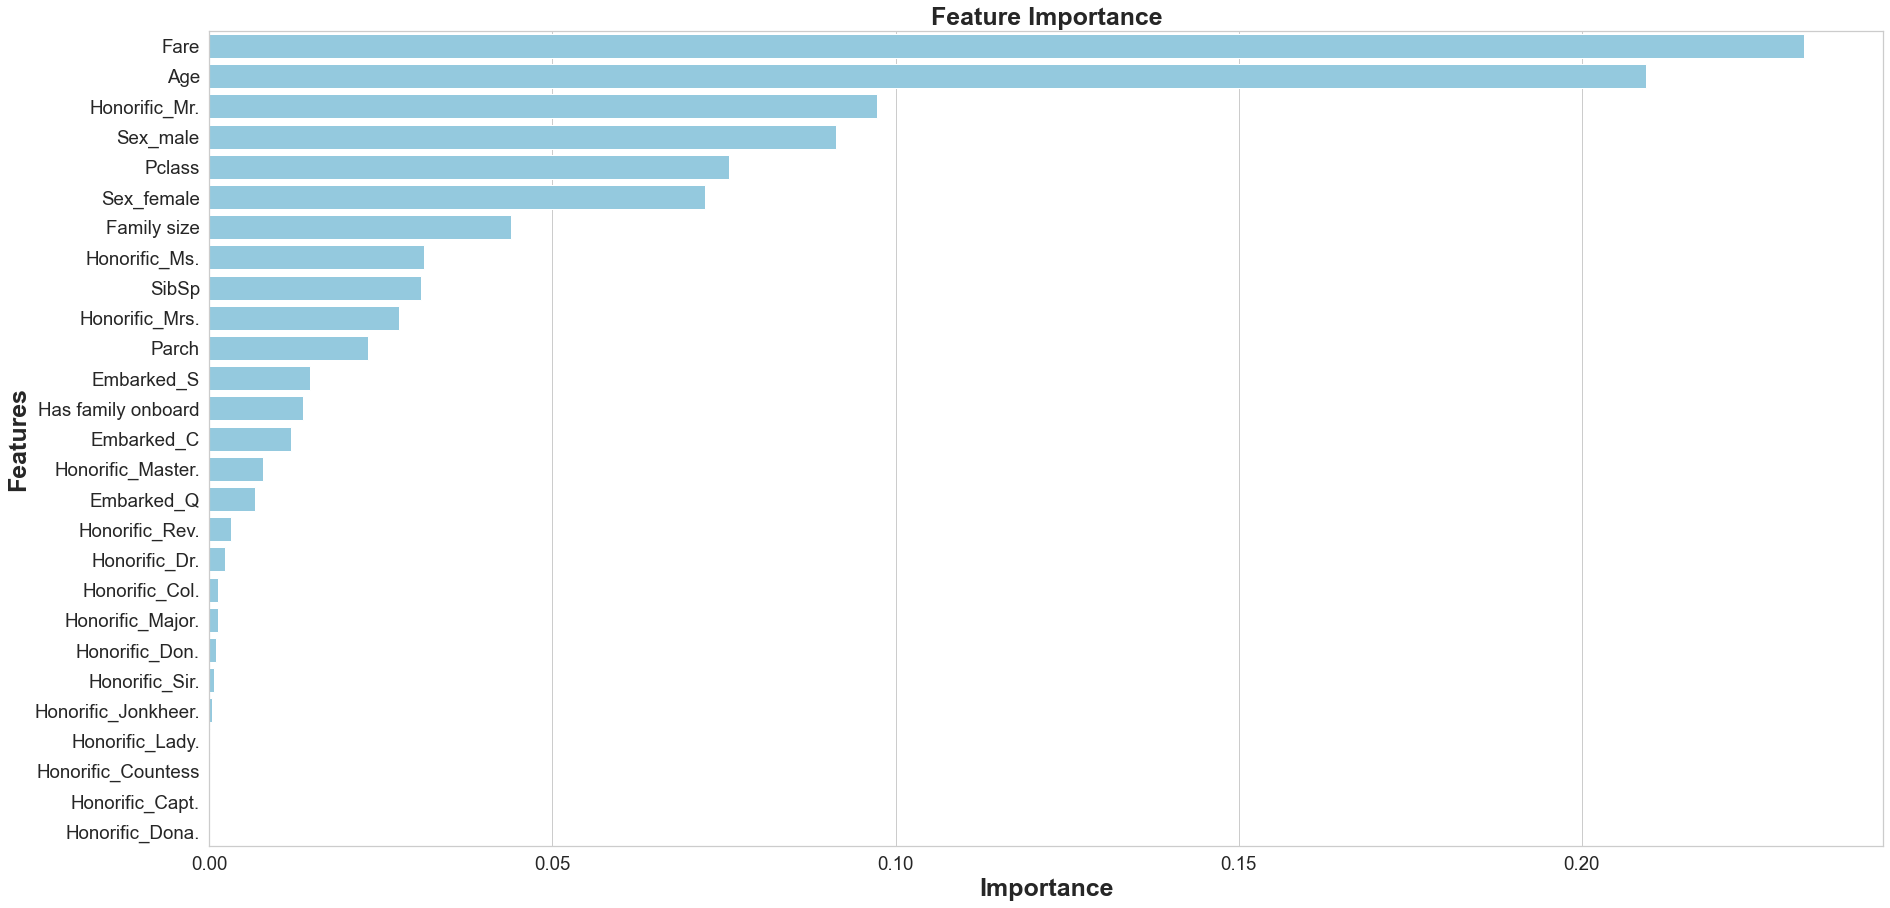

None

,Features,Importance
0,Fare,0.232322
1,Age,0.209399
2,Honorific_Mr.,0.097296
3,Sex_male,0.091334
4,Pclass,0.075682
5,Sex_female,0.072181
6,Family size,0.043985
7,Honorific_Ms.,0.031349
8,SibSp,0.030808
9,Honorific_Mrs.,0.027699


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
feats = {}
for feature, importance in zip(X.columns, rfc1.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

[Text(0.6706528465346535, 0.975, 'Honorific_Ms. <= 0.5\ngini = 0.481\nsamples = 382\nvalue = [372, 251]\nclass = 0'),
 Text(0.4437809405940594, 0.925, 'Has family onboard <= 0.5\ngini = 0.437\nsamples = 314\nvalue = [343, 163]\nclass = 0'),
 Text(0.3088490099009901, 0.875, 'Embarked_C <= 0.5\ngini = 0.336\nsamples = 202\nvalue = [247, 67]\nclass = 0'),
 Text(0.21175742574257425, 0.825, 'Honorific_Mrs. <= 0.5\ngini = 0.301\nsamples = 168\nvalue = [216, 49]\nclass = 0'),
 Text(0.09876237623762377, 0.775, 'Pclass <= 1.5\ngini = 0.246\nsamples = 158\nvalue = [215, 36]\nclass = 0'),
 Text(0.031683168316831684, 0.725, 'Honorific_Mr. <= 0.5\ngini = 0.467\nsamples = 23\nvalue = [22, 13]\nclass = 0'),
 Text(0.015841584158415842, 0.675, 'Age <= 56.0\ngini = 0.444\nsamples = 2\nvalue = [1, 2]\nclass = 1'),
 Text(0.007920792079207921, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]\nclass = 1'),
 Text(0.023762376237623763, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.04752

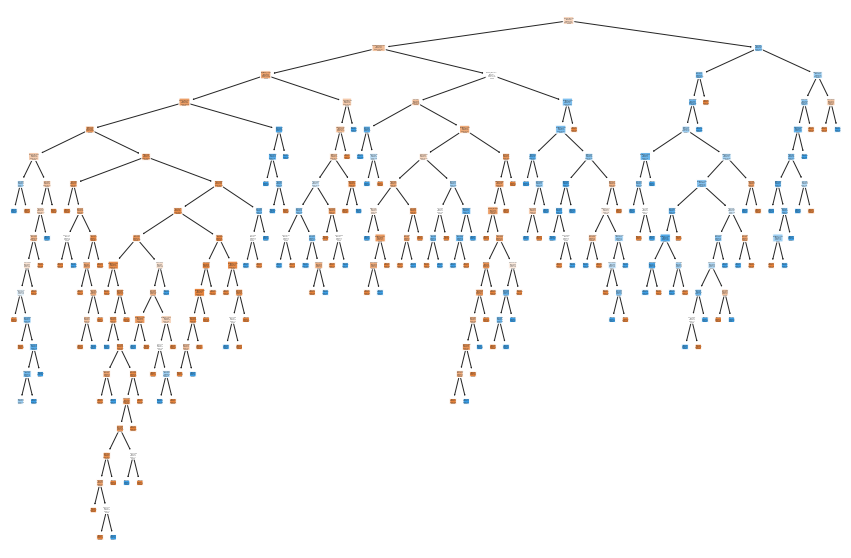

In [66]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(rfc1.estimators_[0], 
          feature_names=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Has family onboard', 'Family size', 'Sex_female', 'Sex_male',
       'Honorific_Capt.', 'Honorific_Col.', 'Honorific_Countess',
       'Honorific_Don.', 'Honorific_Dona.', 'Honorific_Dr.',
       'Honorific_Jonkheer.', 'Honorific_Lady.', 'Honorific_Major.',
       'Honorific_Master.', 'Honorific_Mr.', 'Honorific_Mrs.', 'Honorific_Ms.',
       'Honorific_Rev.', 'Honorific_Sir.', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
          class_names=['0', '1'], 
          filled=True, impurity=True, 
          rounded=True)

# Построить confusion matrix.

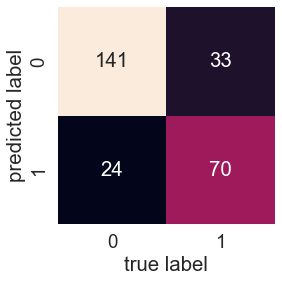

In [67]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test.to_numpy(), y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [68]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       165
         1.0       0.74      0.68      0.71       103

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



# 5. Метод главных компонентов.

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

train_X_scaled = scaler.fit_transform(X_train)
test_X_scaled = scaler.fit_transform(X_test)

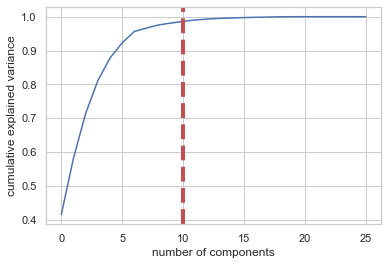

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.415247,0.415247
1,0.581834,0.166587
2,0.714319,0.132485
3,0.810991,0.096673
4,0.877903,0.066911
5,0.922659,0.044756
6,0.956479,0.033820
7,0.966313,0.009834
8,0.975656,0.009343
9,0.981172,0.005516


In [70]:
from sklearn.decomposition import PCA
pca_test = PCA(n_components=26)
pca_test.fit(train_X_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [71]:
pca = PCA(n_components=10)
pca.fit(train_X_scaled)
X_train_scaled_pca = pca.transform(train_X_scaled)
X_test_scaled_pca = pca.transform(test_X_scaled)

Обучить базовую RF-модель после применения к данным метода главных компонент

In [72]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled_pca, y_train)
display(rfc.score(X_train_scaled_pca, y_train))

0.9823434991974318

In [76]:
rfc.score (X_test_scaled_pca, y_test)

0.753731343283582

# 6.Оптимизировать гиперпараметры: RandomizedSearchCV

In [77]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc1, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train_scaled_pca, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 23,
 'max_features': 'log2',
 'max_depth': 14,
 'bootstrap': False}

In [78]:
clf = RandomForestClassifier(max_depth=11, n_estimators=400, min_samples_split=2, min_samples_leaf=23, max_features='sqrt', class_weight='balanced',random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=11,
                       max_features='sqrt', min_samples_leaf=23,
                       n_estimators=400, random_state=42)

In [79]:
y_pred = clf.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7798507462686567


In [81]:
y_pred = clf.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.8549867608120035

In [82]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7835820895522388


In [84]:
y_pred = clf.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7670491320976759

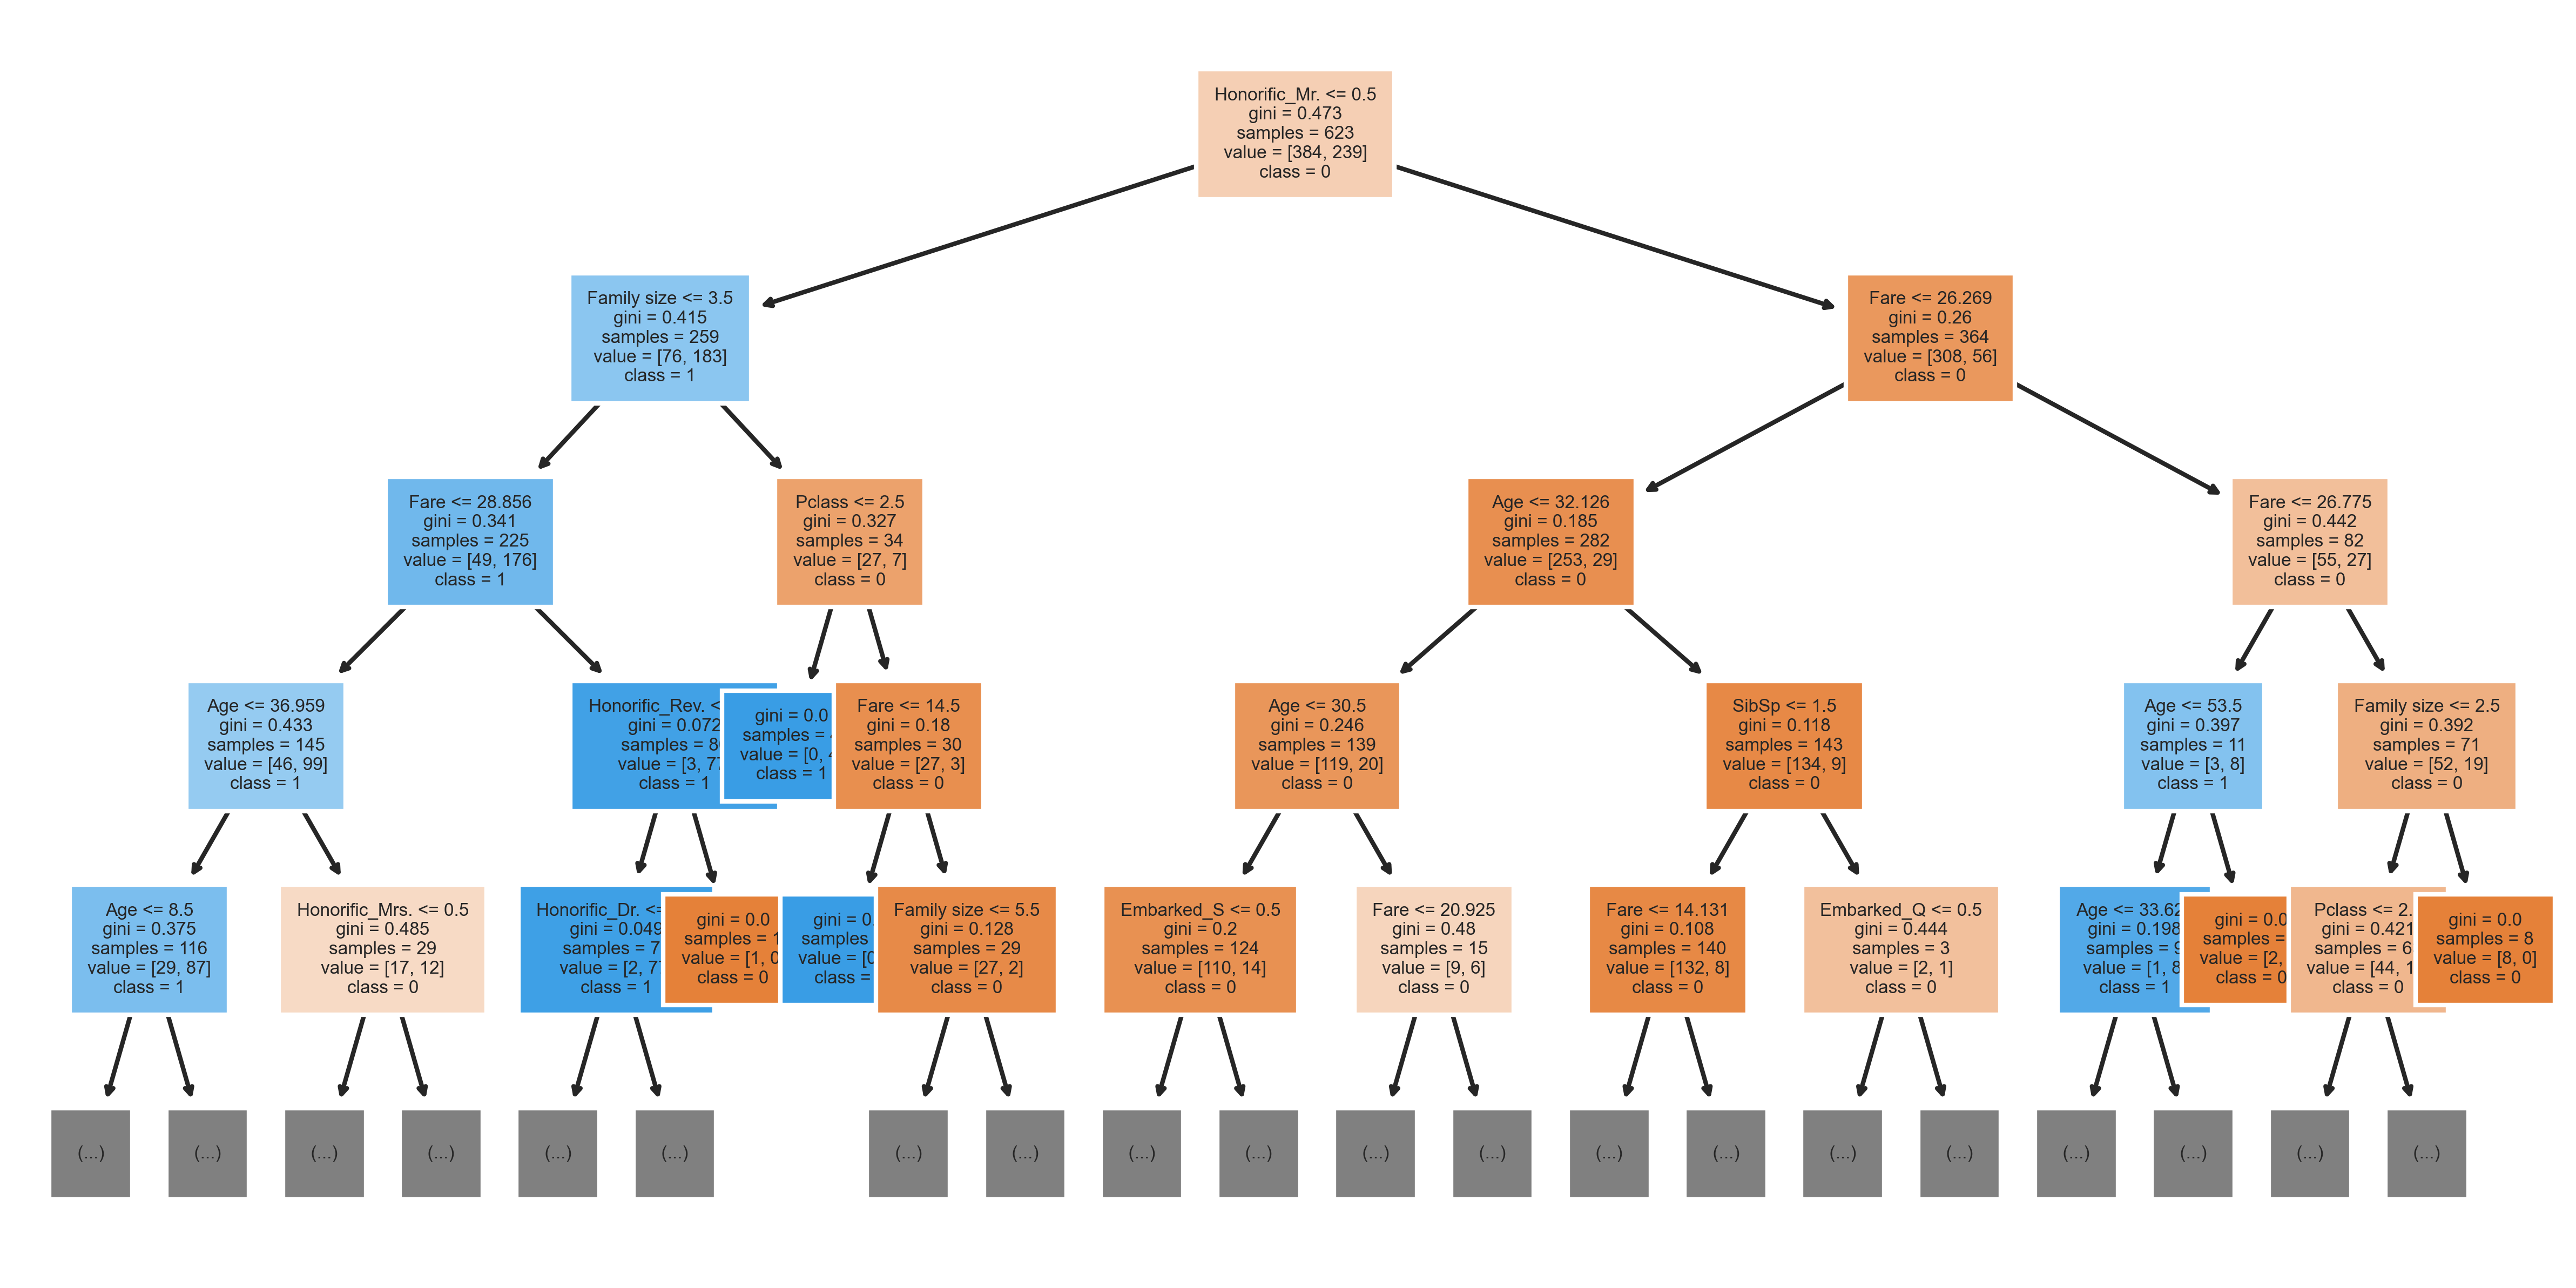

In [83]:
from sklearn import tree
fn=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Has family onboard', 'Family size', 'Sex_female', 'Sex_male',
       'Honorific_Capt.', 'Honorific_Col.', 'Honorific_Countess',
       'Honorific_Don.', 'Honorific_Dona.', 'Honorific_Dr.',
       'Honorific_Jonkheer.', 'Honorific_Lady.', 'Honorific_Major.',
       'Honorific_Master.', 'Honorific_Mr.', 'Honorific_Mrs.', 'Honorific_Ms.',
       'Honorific_Rev.', 'Honorific_Sir.', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=600)
tree.plot_tree(clf, max_depth=4,
               feature_names = fn, 
               class_names=cn, 
               fontsize=4,
               filled = True);

# Без подбора параметров метрика Accuracy точнее.